# 이상치 
- 결측치, 범위에서 벗어나는 데이터, 값이 크게 벗어나는 데이터 
- 분석 모델의 성능을 떨어뜨리거나 결과에 악영향을 미치는 경우가 발생 
- 이상치는 발견 시에 특정한 데이터로 대체, 삭제 
- 결측치를 확인하는 방법
    - isna()를 이용하여 결측치의 유무를 판단하고 sum()을 이용해서 결측치의 개수를 확인
    - info()를 이용하여 non-null count를 보고 결측치의 존재를 파악 
- 특정 범위에 벗어나는 데이터 확인하는 방법 
    - isin()을 이용하여 특정 데이터의 포함 여부를 확인하고 전제 데이터를 비트연산자(~) 부정을 하고 확인 가능 
    - value_counts()를 이용하여 데이터의 개수를 보고 확인 가능 
    - unique()를 이용하여 확인 가능 
- 극단치( 값이 크게 벗어나는 데이터 )
    - IQR 방식 
        - matplot 안에 boxplot의 이상치를 결정하는 방법 
        - Q3(3사분위수)와 Q1(1사분위수)를 이용하여 범위를 지정 
        - IQR = Q3 - Q1
        - 극단치의 경계 
            - 상단의 경계 : Q3 + 1.5 * IQR
            - 하단의 경계 : Q1 - 1.5 * IQR
        - 많은 데이터들이 극단치로 판단이 될 가능성이 존재
        - 1.5의 값을 조절해서 극단치의 범위를 변경

In [1]:
# 라이브러리 로드 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

In [2]:
# 샘플 데이터를 로드 
wine_data = load_wine()

In [3]:
wine_data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]], shape=(178, 13)),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

- sklearn 라이브러리에서 sample data의 키
    - data
        - 독립변수 
        - 머신러닝에서 문제 (학습 데이터)
    - target
        - 종속변수 
        - 독립변수를 이용하여 예측에 대한 답
    - frame
        - 독립변수와 종속변수 데이터를 데이터프레임으로 제공 
        - 데이터가 존재하는 경우와 존재하지 않는 경우가 있다. 
    - DESCR
        - 데이터의 정보를 확인 
    - feature_names
        - 피쳐(컬럼)의 이름을 의미
    - target_names
        - 종속변수의 의미 

In [4]:
wine_data['DESCR']

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 178\n:Number of Attributes: 13 numeric, predictive attributes and the class\n:Attribute Information:\n    - Alcohol\n    - Malic acid\n    - Ash\n    - Alcalinity of ash\n    - Magnesium\n    - Total phenols\n    - Flavanoids\n    - Nonflavanoid phenols\n    - Proanthocyanins\n    - Color intensity\n    - Hue\n    - OD280/OD315 of diluted wines\n    - Proline\n    - class:\n        - class_0\n        - class_1\n        - class_2\n\n:Summary Statistics:\n\n============================= ==== ===== ======= =====\n                                Min   Max   Mean     SD\n============================= ==== ===== ======= =====\nAlcohol:                      11.0  14.8    13.0   0.8\nMalic Acid:                   0.74  5.80    2.34  1.12\nAsh:                          1.36  3.23    2.36  0.27\nAlcalinity of Ash:            10.6  30.0    19.5   3.3\nMagnesium:      

In [5]:
wine = pd.DataFrame(
    data = wine_data['data'], 
    columns = wine_data['feature_names']
)
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
# target data로 데이터프레임에 추가 -> 파생변수 생성
wine['class'] = wine_data['target']

In [7]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  class

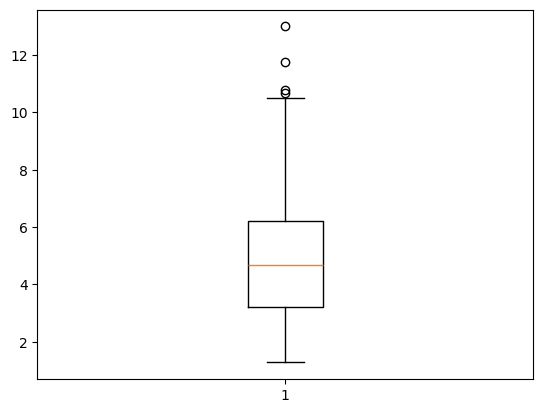

In [8]:
# 특정 컬럼을 선택해서 boxplot()를 그린다. 
plt.boxplot(wine['color_intensity'])
plt.show()

In [9]:
# 사분위수를 describe()를 이용하여 출력이 가능
wine['color_intensity'].describe()['75%']

np.float64(6.2)

In [11]:
# numpy를 이용하여 사분위수를 출력 
q_1, q_3 = np.percentile(
    wine['color_intensity'], 
    [25, 75]
)

In [12]:
# IQR계산 : 3사분위수 - 1사분위수
iqr = q_3 - q_1
# 상단의 경계 값 : 3사분위수 + (1.5 * IQR) 
upper_whis = q_3 + (1.5 * iqr)
# 하단의 경계 값 : 1사분위수 - (1.5 * IQR)
lower_whis = q_1 - (1.5 * iqr)
print(upper_whis, lower_whis)

10.670000000000002 -1.2500000000000009
